## Binary Classification with Tensorflow Multilayer Perceptron(MLP)

In this project, I will implement a Multilayer Perceptron on a churn classification problem via TensorFlow. The dataset  contains 10000 rows and 14 columns including customer information. The binary target variable is given in **Exited** column. Since our dataset is imbalanced, AUC ROC will be used as a evaluation metric as well as accuracy. 

We will go through 5 steps: 

 1) **Preparing Libraries and Data:** Obtaining and investigating the dataset <br>
 2) **Preprocessing the Data:** Enconding categorical variables and scaling numerical variables<br>
 3) **Evaluation Metric and Base Score:** Base score assumption<br>
 4) **Building the MultiLayer Perceptron for Binary Classification:** Implementing TensorFlow MLP model<br>
 5) **Another Trial with a Sampling Method for Imbalanced Datasets:** Improving the evaluation scores with a resampling method


### 1) Preparing Libraries and Data

In [19]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import plotly.express as px

# for preprocess
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# for model
import tensorflow as tf
from tensorflow import keras

# evaluation
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve, auc

In [20]:
# Data
df = pd.read_csv("ProjectX.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Describing the dataset
print(f'Data Shape: {df.shape}')
print('\n -----Data Info and Types of Features-----')
df.info()

print('\n -----Describing Numerical Features-----')
display(df.describe())

print('\n -----Describing Categorical Features-----')
display(df.describe(include='object'))

Data Shape: (10000, 14)

 -----Data Info and Types of Features-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

 -----Describing Numerica

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



 -----Describing Categorical Features-----


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [22]:
# RowNumber, CustomerId, and Surname have no effect on the prediction. Therefore, they should be dropped before the model. 
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [23]:
# features and target
X = df.drop("Exited",axis=1)
y = df["Exited"]

# obtaining training and test sets.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.80,
                                                random_state = 1234, shuffle = False)
print(f'Xtrain shape: {Xtrain.shape}')
print(f'Xtest shape: {Xtest.shape}')
print(f'ytrain shape: {ytrain.shape}')
print(f'ytrain churn percent: {round(ytrain.describe()["mean"]*100,2)}%')
print(f'ytest shape: {ytest.shape}')
print(f'ytest churn percent: {round(ytest.describe()["mean"]*100,2)}%')

Xtrain shape: (8000, 10)
Xtest shape: (2000, 10)
ytrain shape: (8000,)
ytrain churn percent: 20.59%
ytest shape: (2000,)
ytest churn percent: 19.5%


### 2) Preprocessing the Data

Preprocessing should be performed on Xtrain before the model. 
 - For **categorical features**, if a variable is binary, LabelEncoder is used. However if it is more than 2, then OneHotEncoder is used.
 
 - For **numerical features**, the scales of the features can affect the performance of the model (especially if some features have higher decimals comparing the others). Therefore, scaling is needed. I tried some transformations such as StandardScaler, MinMaxScaler, Logarithmic transformation, and PowerTransformer. The best metrics are obtained with StandardScaler. It removes the mean and scales to unit variance. 


In [24]:
# preprocessing.LabelEncoder does not work well with ColumnTransformer
class PipelineLabelEncoder(LabelEncoder):

    def fit_transform(self, y, *args, **kwargs):
        X = np.empty(y.shape)
        df = False
        if type(y) == pd.DataFrame:
            df = True
        for i in range(y.shape[1]):
            if df:
                X[:,i] = super().fit_transform(y.iloc[:,i])
            else:
                X[:,i] = super().fit_transform(y[:,i])
        return X

    def transform(self, y, *args, **kwargs):
        X = np.empty(y.shape)
        df = False
        if type(y) == pd.DataFrame:
            df = True
        for i in range(y.shape[1]):
            if df:
                X[:,i] = super().transform(y.iloc[:,i])
            else:
                X[:,i] = super().transform(y[:,i])
        return X

In [25]:
# for categorical features 
object_bool_le = (Xtrain.dtypes == 'object') & (Xtrain.nunique() == 2)
object_bool_ohe = (Xtrain.dtypes == 'object') & (Xtrain.nunique() > 2)

object_var_le = Xtrain.dtypes[object_bool_le].index
object_var_ohe = Xtrain.dtypes[object_bool_ohe].index

# ColumnTransformer for categorical and numerical features
ct = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown = 'ignore'), object_var_ohe),
                        ('le', PipelineLabelEncoder(), object_var_le)
                       ], remainder=preprocessing.StandardScaler()) # I also tried PowerTransformer, MinMaxScaler(), and FunctionTransformer(np.log1p, validate=True)


XtrainP = ct.fit_transform(Xtrain)
XtestP = ct.transform(Xtest)

### 3) Evaluation and Base Metrics

Since we have imbalanced data, only accuracy is not enough to evaluate the model. Therefore, ROC-AUC and/or F1 score can be used to track true and false positives. 

Before we start building a MLP Model, I wanted to learn the training base accuracy and ROC-AUC.

In [26]:
# I assume all data do not churn for basis scores
y_base = np.zeros(ytrain.shape)

# Since we can not differentiate positive and negative classes correctly, our AUC score is 0.5
base_auc = round(roc_auc_score(ytrain, y_base),2)
base_acc = round(accuracy_score(ytrain, y_base),2)

print(f'Base AUC: {base_auc}, Base Accuracy: {base_acc}')

Base AUC: 0.5, Base Accuracy: 0.79


Since we can not differentiate positive and negative classes correctly, our AUC score is 0.5. However even if we can not differentiate the classes, we get around %80 percent accuracy. That's why the accuracy score can be confusing for imbalanced datasets.

### 4) Building the MultiLayer Perceptron for Binary Classification

In [27]:
# learn and validation sets for the model
Xlearn, Xval, ylearn, yval = train_test_split(XtrainP, ytrain, test_size = 0.25,
                                              random_state = 1234,
                                              stratify = ytrain, # for imbalanced dataset
                                              shuffle = True)
print(Xlearn.shape, ylearn.shape, Xval.shape, yval.shape)

(6000, 12) (6000,) (2000, 12) (2000,)


In [28]:
# Model architecture part
mlp_model= keras.models.Sequential([
    keras.layers.Input(name = "input", shape = (Xlearn.shape[1],)),
    keras.layers.Dense(50, name = "first_relu", activation = "relu"),
    keras.layers.Dropout(rate = 0.2), # dropout layer to deal with overfitting
    keras.layers.Dense(25, name = "second_relu", activation = "relu"),
    keras.layers.Dropout(rate = 0.2), # dropout layer to deal with overfitting
    keras.layers.Dense(1, name = "output", activation = "sigmoid") # since it is binary classification, sigmoid activation function should be used.
])

mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_relu (Dense)          (None, 50)                650       
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 second_relu (Dense)         (None, 25)                1275      
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 output (Dense)              (None, 1)                 26        
                                                                 
Total params: 1,951
Trainable params: 1,951
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile part
mlp_model.compile(loss = "binary_crossentropy", # since we have a binary classification, binary_crossentropy is used.
                  optimizer = keras.optimizers.Adam(learning_rate = 0.0001), # Adam optimizer is kind of gradient descent approach with some momentum
                  metrics = ["Accuracy", "AUC"]) # metrics to be tracked

# Early stopping Criterion 
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10,
                                              restore_best_weights = True, # restore is important. It will support the best ones instead of the last ones
                                              mode = 'auto' )

# Fit operation 
start = time.time() 
mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 32,
                            callbacks = [early_stopping1],
                            verbose = 1, 
                            validation_data = (Xval, yval))
end = time.time()
mlp_model_time_diff = round((end - start),2) # time difference to obtain the run time. (performance consideration) 

Epoch 1/200
188/188 [==============================] - 0s 1ms/step - loss: 0.7283 - Accuracy: 0.4837 - auc: 0.5454 - val_loss: 0.6090 - val_Accuracy: 0.7455 - val_auc: 0.5847
Epoch 2/200
188/188 [==============================] - 0s 689us/step - loss: 0.5810 - Accuracy: 0.7358 - auc: 0.5848 - val_loss: 0.5247 - val_Accuracy: 0.7925 - val_auc: 0.6327
Epoch 3/200
188/188 [==============================] - 0s 690us/step - loss: 0.5192 - Accuracy: 0.7872 - auc: 0.6214 - val_loss: 0.4894 - val_Accuracy: 0.7950 - val_auc: 0.6703
Epoch 4/200
188/188 [==============================] - 0s 685us/step - loss: 0.4924 - Accuracy: 0.7937 - auc: 0.6572 - val_loss: 0.4729 - val_Accuracy: 0.7950 - val_auc: 0.6975
Epoch 5/200
188/188 [==============================] - 0s 684us/step - loss: 0.4764 - Accuracy: 0.7978 - auc: 0.6844 - val_loss: 0.4627 - val_Accuracy: 0.7955 - val_auc: 0.7166
Epoch 6/200
188/188 [==============================] - 0s 688us/step - loss: 0.4634 - Accuracy: 0.7988 - auc: 0.7124 

188/188 [==============================] - 0s 709us/step - loss: 0.3485 - Accuracy: 0.8543 - auc: 0.8557 - val_loss: 0.3624 - val_Accuracy: 0.8535 - val_auc: 0.8364
Epoch 94/200
188/188 [==============================] - 0s 715us/step - loss: 0.3439 - Accuracy: 0.8610 - auc: 0.8599 - val_loss: 0.3622 - val_Accuracy: 0.8525 - val_auc: 0.8366
Epoch 95/200
188/188 [==============================] - 0s 699us/step - loss: 0.3453 - Accuracy: 0.8618 - auc: 0.8555 - val_loss: 0.3623 - val_Accuracy: 0.8525 - val_auc: 0.8364
Epoch 96/200
188/188 [==============================] - 0s 685us/step - loss: 0.3467 - Accuracy: 0.8565 - auc: 0.8558 - val_loss: 0.3621 - val_Accuracy: 0.8525 - val_auc: 0.8366
Epoch 97/200
188/188 [==============================] - 0s 677us/step - loss: 0.3472 - Accuracy: 0.8548 - auc: 0.8567 - val_loss: 0.3621 - val_Accuracy: 0.8525 - val_auc: 0.8366
Epoch 98/200
188/188 [==============================] - 0s 679us/step - loss: 0.3463 - Accuracy: 0.8577 - auc: 0.8565 - val

Epoch 139/200
188/188 [==============================] - 0s 697us/step - loss: 0.3413 - Accuracy: 0.8645 - auc: 0.8603 - val_loss: 0.3603 - val_Accuracy: 0.8520 - val_auc: 0.8390
Epoch 140/200
188/188 [==============================] - 0s 679us/step - loss: 0.3388 - Accuracy: 0.8635 - auc: 0.8598 - val_loss: 0.3602 - val_Accuracy: 0.8530 - val_auc: 0.8392
Epoch 141/200
188/188 [==============================] - 0s 681us/step - loss: 0.3356 - Accuracy: 0.8635 - auc: 0.8653 - val_loss: 0.3601 - val_Accuracy: 0.8530 - val_auc: 0.8394
Epoch 142/200
188/188 [==============================] - 0s 681us/step - loss: 0.3391 - Accuracy: 0.8610 - auc: 0.8621 - val_loss: 0.3601 - val_Accuracy: 0.8515 - val_auc: 0.8388
Epoch 143/200
188/188 [==============================] - 0s 679us/step - loss: 0.3373 - Accuracy: 0.8608 - auc: 0.8657 - val_loss: 0.3600 - val_Accuracy: 0.8515 - val_auc: 0.8389
Epoch 144/200
188/188 [==============================] - 0s 675us/step - loss: 0.3406 - Accuracy: 0.8612 

In [30]:
# Evaluation part
print(f'MLP Model Time Difference: {mlp_model_time_diff} seconds\n')
print(mlp_model.evaluate(Xlearn, ylearn))
print(mlp_model.evaluate(Xval, yval))
print(mlp_model.evaluate(XtestP, ytest))
y_pred = mlp_model.predict(XtestP).ravel()

MLP Model Time Difference: 21.56 seconds

188/188 [==============================] - 0s 403us/step - loss: 0.3182 - Accuracy: 0.8703 - auc: 0.8813
[0.31817418336868286, 0.8703333139419556, 0.8812782764434814]
63/63 [==============================] - 0s 416us/step - loss: 0.3595 - Accuracy: 0.8520 - auc: 0.8396
[0.35946929454803467, 0.8519999980926514, 0.8395636081695557]
63/63 [==============================] - 0s 395us/step - loss: 0.3501 - Accuracy: 0.8555 - auc: 0.8404
[0.35014715790748596, 0.8554999828338623, 0.840394139289856]
63/63 [==============================] - 0s 311us/step


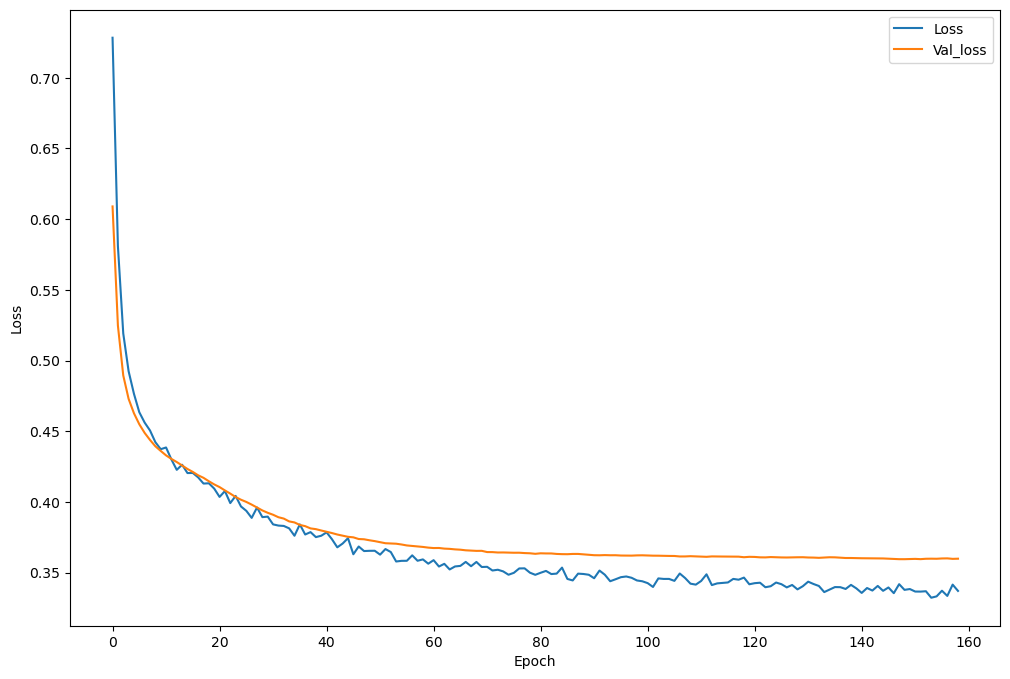

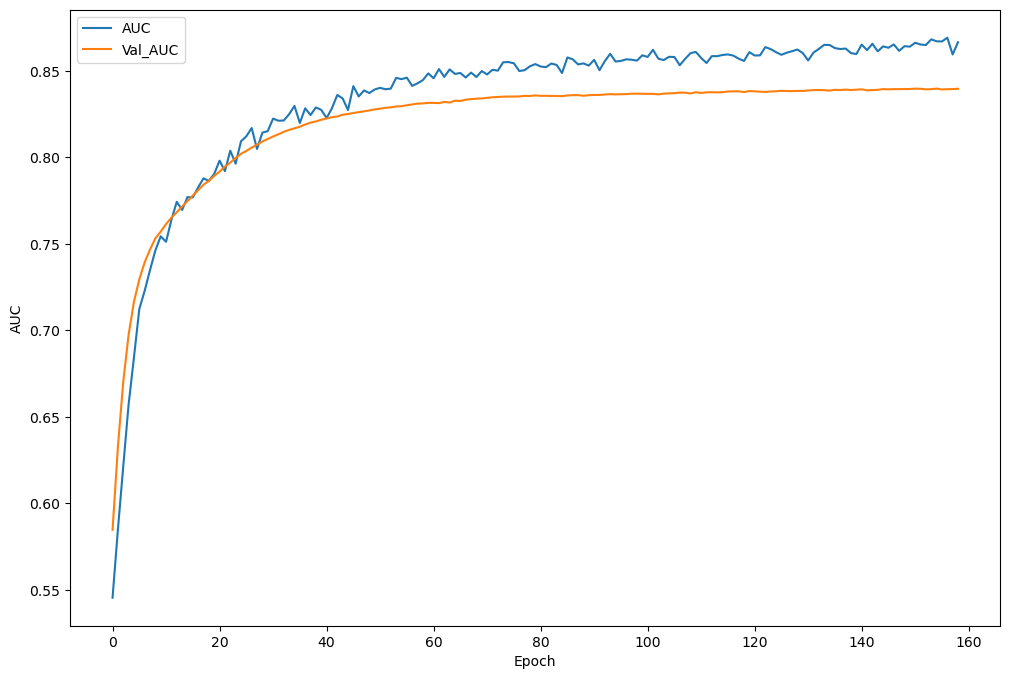

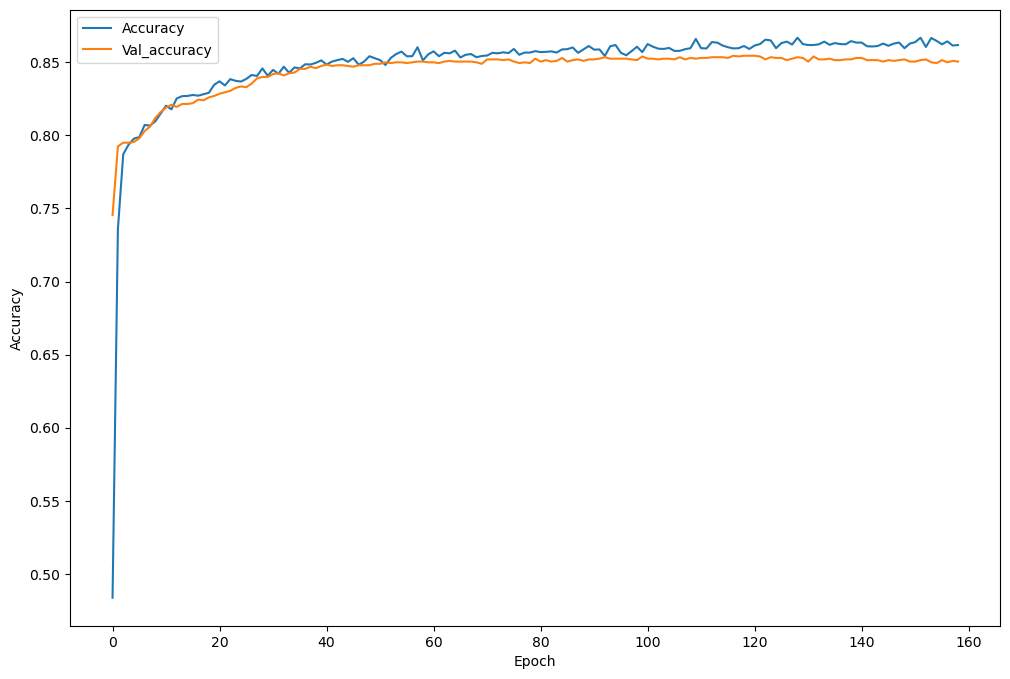

In [31]:
# Plotting the metrics for evaluation
# For loss function
plt.figure(figsize=(12,8))
plt.plot(mlp_history.history['loss'], label="Loss")
plt.plot(mlp_history.history['val_loss'], label="Val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# For ROC - AUC metric
plt.figure(figsize=(12,8))
plt.plot(mlp_history.history['auc'], label="AUC")
plt.plot(mlp_history.history['val_auc'], label="Val_AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

# For Accuracy metric
plt.figure(figsize=(12,8))
plt.plot(mlp_history.history['Accuracy'], label="Accuracy")
plt.plot(mlp_history.history['val_Accuracy'], label="Val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#ROC plot - this part is taken from plotly.express website.
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(ytest, y_pred)
fig = px.area(
    x=mlp_fpr, y=mlp_tpr,
    title=f'Test ROC Curve (AUC={auc(mlp_fpr, mlp_tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

**Evaluation Comments:** 

 - While our base AUC is 0.5 and base accuracy is 0.79, The MLP Model has higher both AUC (learn AUC: 0.8894, test AUC: 0.8477) and accuracy (learn Acc: 0.8737, test Acc: 0.8540).
 - To deal with overfitting, only dropout layers were used since regularization methods gave worse results. 
 - Early stopping was used to prevent computation overload. 
 - In fit part, class weight was not used since it gave worse results. However, I will also try under sampling to improve the results in the following section.
 - Because of initialization, the number of epochs can change and as a result, the graphs change too. For example, sometimes the model loss starts from around 0.35 and stops at around 0.30 after a few epochs, but it gives similar AUC and accuracy results. 
 - We still have a little bit overfitting issue. It may be improved by using regularization, dropout layers or decreasing nodes in hidden layers. However, I could not get better results by adding them into the model.
 

### 5) Another Trial with a Sampling Method for Imbalanced Datasets

For imbalanced datasets, some methods like class weight, over or under sampling can be applied to increase the metrics. At the first model, class_weight was tried and did not give better results. In this model, an undersampling method called TOMEKLinks is used. Oversampling methods like SMOTE were also tried. However, the slightly improved results obtained from TOMEK are given below. 

In [32]:
import imblearn # a library for dealing with imbalanced datasets
#!pip install imbalanced-learn
undersample = imblearn.under_sampling.TomekLinks()   

# before training, I used TomekLinks
Xtrain_new, ytrain_new = undersample.fit_resample(XtrainP, ytrain)
XlearnS, XvalS, ylearnS, yvalS = train_test_split(Xtrain_new, ytrain_new, test_size = 0.20,
                                              random_state = 1234,
                                              stratify = ytrain_new, # still have imbalanced dataset
                                              shuffle = True)

print(f'Xtrain shape: {XtrainP.shape}, After sampling, Xtrain Shape: {Xtrain_new.shape}')
print(f'After sampling, ytrain positive percent: {round((ytrain_new.value_counts()[1]/ytrain_new.shape[0])*100,2)}')

Xtrain shape: (8000, 12), After sampling, Xtrain Shape: (7611, 12)
After sampling, ytrain positive percent: 21.64


In [33]:
# The same model is created. Only data are different. 
mlp_model_sampling= keras.models.Sequential([
    keras.layers.Input(name = "input", shape = (Xlearn.shape[1],)),
    keras.layers.Dense(50, name = "second_relu", activation = "relu"),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(25, name = "third_relu", activation = "relu"),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(1, name = "output", activation = "sigmoid") 
])

mlp_model_sampling.compile(loss = "binary_crossentropy",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics = ["Accuracy", "AUC"])
# early stopping 
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10,
                                              restore_best_weights = True, 
                                              mode = 'auto' ) 

# Fit operation 
start = time.time()
mlp_history_sampling = mlp_model_sampling.fit(XlearnS, ylearnS,
                            epochs = 200,
                            batch_size = 64,
                            callbacks = [early_stopping1],
                            verbose = 1,
                            validation_data = (XvalS, yvalS))
end = time.time()
mlps_model_time_diff = round((end - start),2) # time difference to obtain the run time. (performance consideration) 

Epoch 1/200
96/96 [==============================] - 0s 2ms/step - loss: 0.6622 - Accuracy: 0.6033 - auc: 0.5017 - val_loss: 0.5991 - val_Accuracy: 0.7479 - val_auc: 0.5268
Epoch 2/200
96/96 [==============================] - 0s 758us/step - loss: 0.5962 - Accuracy: 0.7305 - auc: 0.5054 - val_loss: 0.5479 - val_Accuracy: 0.7820 - val_auc: 0.5788
Epoch 3/200
96/96 [==============================] - 0s 761us/step - loss: 0.5510 - Accuracy: 0.7677 - auc: 0.5608 - val_loss: 0.5168 - val_Accuracy: 0.7833 - val_auc: 0.6403
Epoch 4/200
96/96 [==============================] - 0s 769us/step - loss: 0.5245 - Accuracy: 0.7791 - auc: 0.5990 - val_loss: 0.4967 - val_Accuracy: 0.7833 - val_auc: 0.6916
Epoch 5/200
96/96 [==============================] - 0s 760us/step - loss: 0.5071 - Accuracy: 0.7802 - auc: 0.6393 - val_loss: 0.4829 - val_Accuracy: 0.7833 - val_auc: 0.7244
Epoch 6/200
96/96 [==============================] - 0s 767us/step - loss: 0.4964 - Accuracy: 0.7820 - auc: 0.6612 - val_loss: 

Epoch 94/200
96/96 [==============================] - 0s 805us/step - loss: 0.3573 - Accuracy: 0.8466 - auc: 0.8571 - val_loss: 0.3557 - val_Accuracy: 0.8601 - val_auc: 0.8565
Epoch 95/200
96/96 [==============================] - 0s 785us/step - loss: 0.3570 - Accuracy: 0.8523 - auc: 0.8559 - val_loss: 0.3555 - val_Accuracy: 0.8588 - val_auc: 0.8566
Epoch 96/200
96/96 [==============================] - 0s 812us/step - loss: 0.3582 - Accuracy: 0.8548 - auc: 0.8534 - val_loss: 0.3555 - val_Accuracy: 0.8588 - val_auc: 0.8566
Epoch 97/200
96/96 [==============================] - 0s 824us/step - loss: 0.3569 - Accuracy: 0.8533 - auc: 0.8554 - val_loss: 0.3554 - val_Accuracy: 0.8601 - val_auc: 0.8568
Epoch 98/200
96/96 [==============================] - 0s 817us/step - loss: 0.3569 - Accuracy: 0.8528 - auc: 0.8568 - val_loss: 0.3552 - val_Accuracy: 0.8582 - val_auc: 0.8569
Epoch 99/200
96/96 [==============================] - 0s 801us/step - loss: 0.3577 - Accuracy: 0.8522 - auc: 0.8543 - va

96/96 [==============================] - 0s 797us/step - loss: 0.3406 - Accuracy: 0.8540 - auc: 0.8699 - val_loss: 0.3455 - val_Accuracy: 0.8621 - val_auc: 0.8646
Epoch 187/200
96/96 [==============================] - 0s 774us/step - loss: 0.3431 - Accuracy: 0.8566 - auc: 0.8666 - val_loss: 0.3456 - val_Accuracy: 0.8615 - val_auc: 0.8650
Epoch 188/200
96/96 [==============================] - 0s 788us/step - loss: 0.3416 - Accuracy: 0.8589 - auc: 0.8690 - val_loss: 0.3455 - val_Accuracy: 0.8615 - val_auc: 0.8650
Epoch 189/200
96/96 [==============================] - 0s 776us/step - loss: 0.3402 - Accuracy: 0.8602 - auc: 0.8681 - val_loss: 0.3453 - val_Accuracy: 0.8615 - val_auc: 0.8649
Epoch 190/200
96/96 [==============================] - 0s 780us/step - loss: 0.3375 - Accuracy: 0.8609 - auc: 0.8722 - val_loss: 0.3453 - val_Accuracy: 0.8615 - val_auc: 0.8648
Epoch 191/200
96/96 [==============================] - 0s 773us/step - loss: 0.3414 - Accuracy: 0.8619 - auc: 0.8694 - val_loss: 

After sampling, MLP Model Time Difference: 16.05 seconds

191/191 [==============================] - 0s 401us/step - loss: 0.3250 - Accuracy: 0.8663 - auc: 0.8820
[0.3249720633029938, 0.8662943243980408, 0.8820083141326904]
48/48 [==============================] - 0s 456us/step - loss: 0.3342 - Accuracy: 0.8621 - auc: 0.8763
[0.3342036008834839, 0.8621142506599426, 0.8763062953948975]
63/63 [==============================] - 0s 423us/step - loss: 0.3501 - Accuracy: 0.8555 - auc: 0.8404
[0.35014715790748596, 0.8554999828338623, 0.840394139289856]
63/63 [==============================] - 0s 324us/step


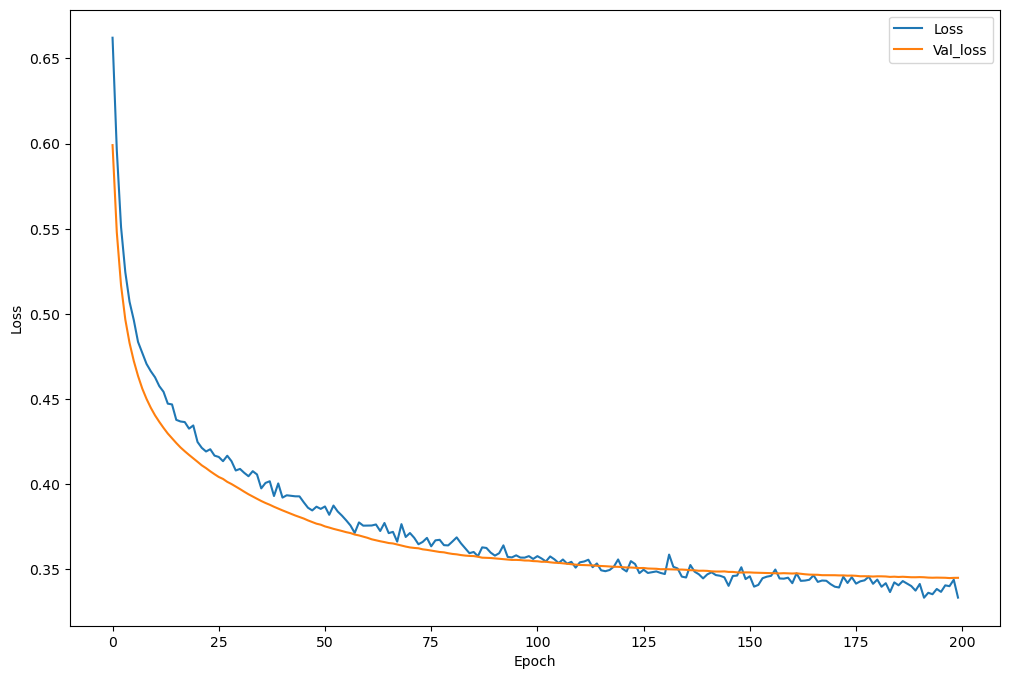

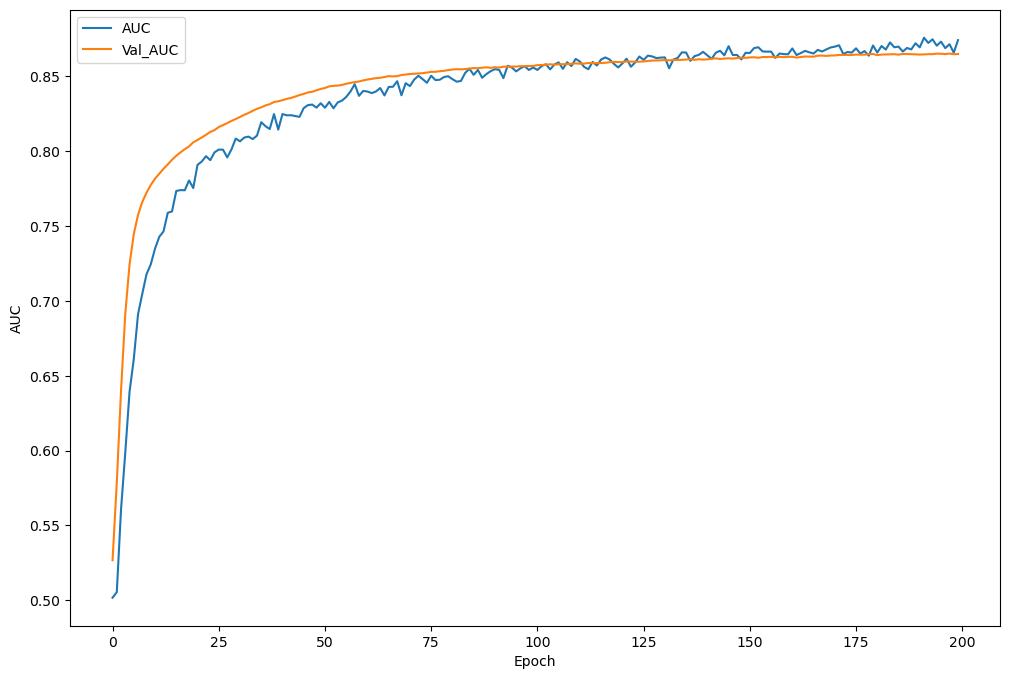

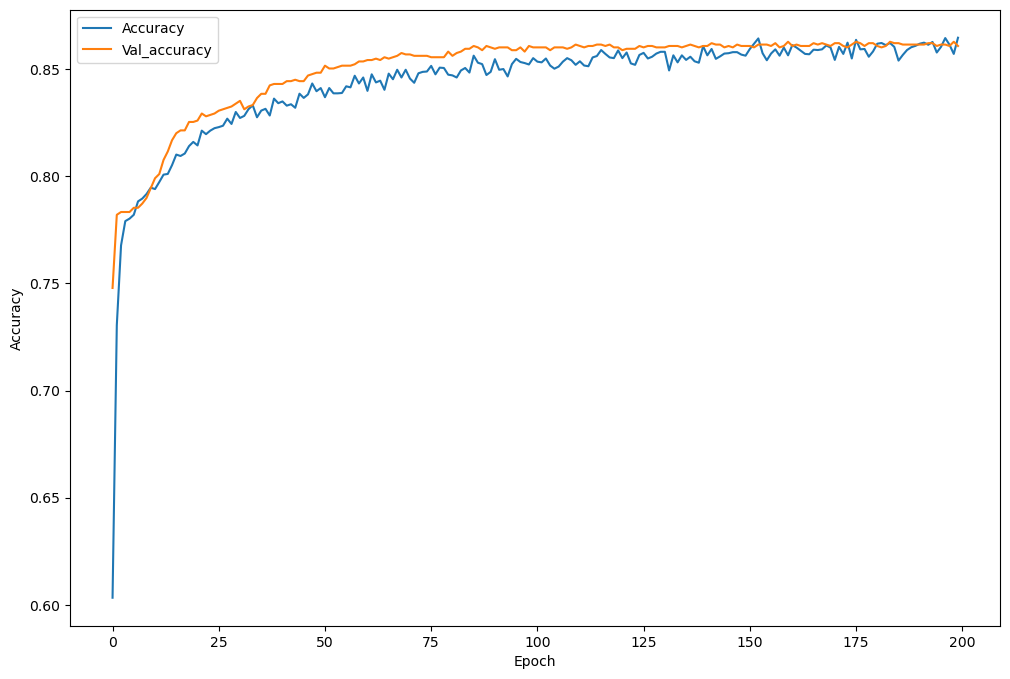

In [35]:
# evaluation part
print(f'After sampling, MLP Model Time Difference: {mlps_model_time_diff} seconds\n')
print(mlp_model.evaluate(XlearnS, ylearnS))
print(mlp_model.evaluate(XvalS, yvalS))
print(mlp_model.evaluate(XtestP, ytest))
y_pred_sample = mlp_model_sampling.predict(XtestP).ravel()

# plotting part
plt.figure(figsize=(12,8))
plt.plot(mlp_history_sampling.history['loss'], label="Loss")
plt.plot(mlp_history_sampling.history['val_loss'], label="Val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(mlp_history_sampling.history['auc'], label="AUC")
plt.plot(mlp_history_sampling.history['val_auc'], label="Val_AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(mlp_history_sampling.history['Accuracy'], label="Accuracy")
plt.plot(mlp_history_sampling.history['val_Accuracy'], label="Val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#ROC plot - this part is taken from plotly.express website.
mlps_fpr, mlps_tpr, mlps_thresholds = roc_curve(ytest, y_pred_sample)
fig = px.area(
    x=mlps_fpr, y=mlps_tpr,
    title=f'Test ROC Curve (AUC={auc(mlps_fpr, mlps_tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

**Evaluation Comments:** 

 - Comparing to the previous model, The model after sampling had little bit improved AUC and overfitting issue.
 - To be honest, the test results were difficult to be improved.
 - Early stopping was used to prevent computation overload. 
 - Because of initialization, the number of epochs can change and as a result, the graphs changes too. 
 - Depending on the initialization, the model after sampling was generally faster.
 